In [22]:
import pandas as pd
import seaborn as sns
import warnings

In [23]:
zillow_df=pd.read_csv('zillow_df_year.csv')
zillow_df

,date_year,10025,10023,10128,10011,10003,11201,11234,10314,11215,...,11231,10304,10705,10305,10704,11003,10309,10308,94085,10303
0,2009,854500,1374950,987550,1508800,1396050,696300,370600,286550,516850,...,572650,272350,352500,328350,355750,280650,311800,317600,410600,261350
1,2010,859050,1344550,1009050,1446300,1278700,765950,390600,287100,545700,...,597400,260750,330500,321300,348050,277400,313900,324750,405550,258250
2,2011,898600,1379700,982150,1435900,1363050,796650,375050,275200,605250,...,649250,248150,332450,305150,332500,267050,302150,317550,392250,243750
3,2012,915050,1380450,1056000,1542250,1370400,838000,366950,268600,618500,...,669900,233250,303050,300250,310800,259400,298750,309700,400850,232000
4,2013,1045000,1496400,1168400,1798350,1533100,923350,374350,274300,715350,...,765900,237400,310850,301850,311200,262550,308650,315250,517150,232000
5,2014,1141150,1729600,1225850,2029500,1735500,1148900,393250,283200,861200,...,951250,238550,321850,314850,326900,279850,317100,319700,580600,242200
6,2015,1224700,1724050,1362000,2066800,1809000,1299950,416750,292050,945150,...,1013650,261650,325950,320350,336450,296900,327200,323850,673450,256450
7,2016,1361250,1913000,1525650,2268000,1935350,1336750,439400,316500,975350,...,1115050,276100,340600,361250,349700,315400,344450,348200,778800,278250
8,2017,1342900,1988700,1622500,2354000,2005500,1400200,473300,345950,1045400,...,1202550,311050,382250,407900,386000,345700,374150,392100,782650,312450


In [24]:
airbnb_df=pd.read_csv('nyc_df.csv')
airbnb_df

,id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2539,"Brooklyn , NY, United States",Brooklyn,Kensington,Brooklyn,Brooklyn,NY,11218.0,New York,"Brooklyn , NY",...,9,2015-12-04,2018-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0
1,2595,"New York, NY, United States",Manhattan,Midtown,Manhattan,New York,NY,10018.0,New York,"New York, NY",...,45,2009-11-21,2019-05-21,95.0,10.0,9.0,10.0,10.0,10.0,9.0
2,3647,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027.0,New York,"New York, NY",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3831,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238.0,New York,"Brooklyn, NY",...,270,2014-09-30,2019-07-05,90.0,10.0,9.0,10.0,10.0,10.0,9.0
4,5022,"New York, NY, United States",East Harlem,East Harlem,Manhattan,New York,NY,10029.0,New York,"New York, NY",...,9,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0
5,5099,"New York, NY, United States",Midtown East,Murray Hill,Manhattan,New York,NY,10016.0,New York,"New York, NY",...,74,2009-04-20,2019-06-22,89.0,10.0,9.0,10.0,10.0,9.0,9.0
6,5121,"Brooklyn, NY, United States",Brooklyn,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216.0,New York,"Brooklyn, NY",...,49,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0
7,5178,"New York, NY, United States",Manhattan,Hell's Kitchen,Manhattan,New York,NY,10019.0,New York,"New York, NY",...,430,2009-05-06,2019-06-24,84.0,9.0,7.0,10.0,9.0,10.0,9.0
8,5203,"New York, NY, United States",Upper West Side,Upper West Side,Manhattan,New York,NY,10025.0,New York,"New York, NY",...,118,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0
9,5238,"New York, NY, United States",Lower East Side,Chinatown,Manhattan,New York,NY,10002.0,New York,"New York, NY",...,160,2009-09-01,2019-06-09,94.0,10.0,9.0,10.0,10.0,9.0,9.0


### Extract Airbnb data with zipcodes present in willow data and no of bedrooms = 2

In [34]:
!pip install nbconvert

In [25]:
#obtain array of zipcodes present in zillow data for New york City
zipcodes=zillow_df.T[1:].index.astype(int).array

def region_present(each_row):
    if int(each_row) in zipcodes:
        return True
    else:
        return False

#Dataframe with airbnb data of zipcodes present in zillow data and two bedroom properties   
airbnb_unique_df=airbnb_df[airbnb_df.zipcode.apply(region_present)]
airbnb_unique_df=airbnb_unique_df[airbnb_unique_df.bedrooms==2]

### Median Price of two bedroom properties in each zipcode

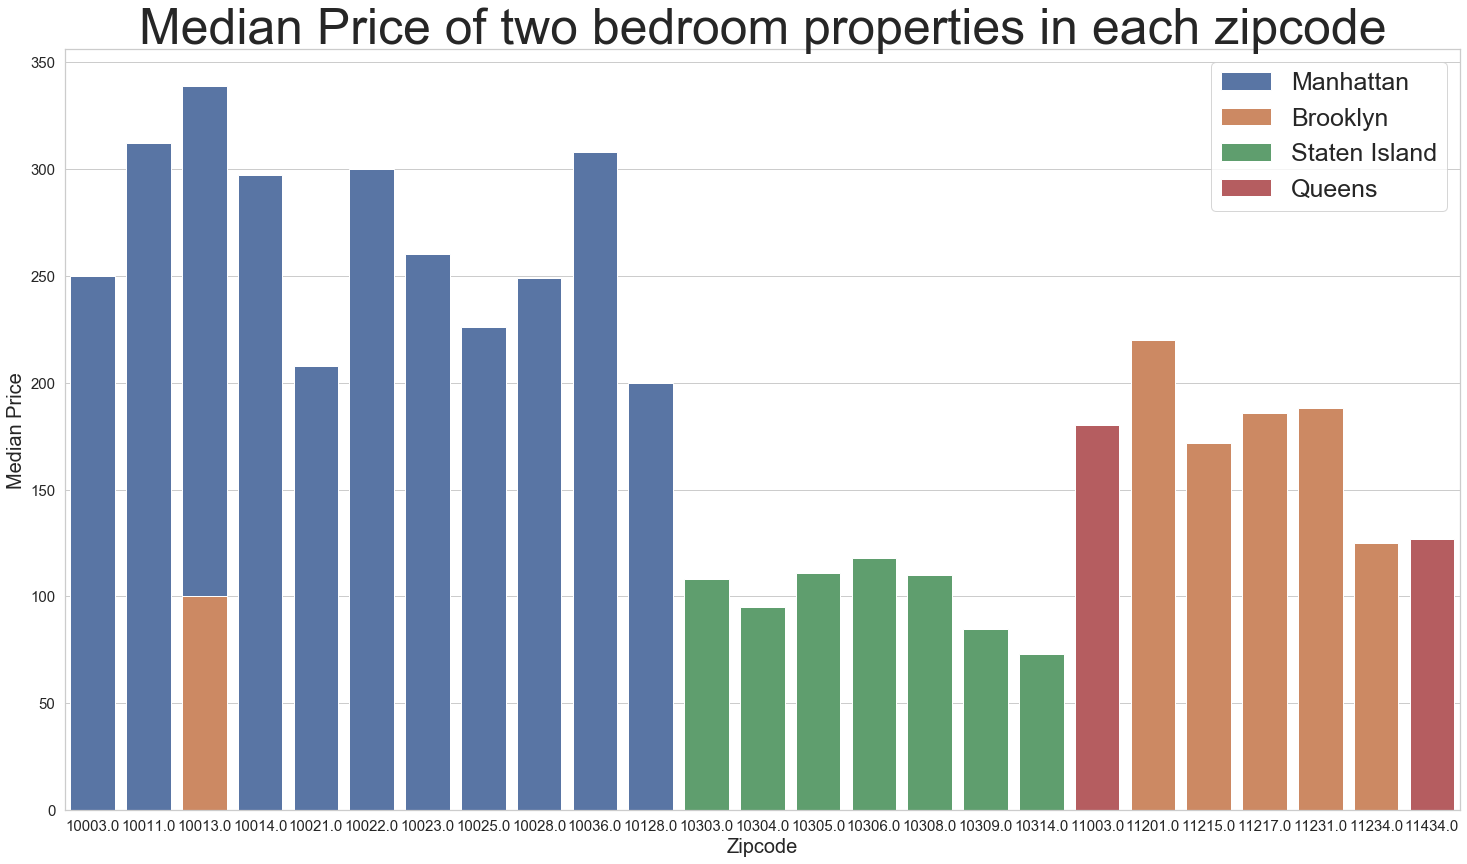

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 14]
plt.rcParams['axes.labelsize'] = 30

#Remove $ sign in price column
airbnb_unique_df['price']=airbnb_unique_df['price'].replace('[\$,]', '', regex=True).astype(float)

#Obtain median price for each zipcode
df=airbnb_unique_df.groupby(['zipcode','neighbourhood_group_cleansed'])['price'].median().to_frame().reset_index()
df.price=df.price.round()

#Plot bargraph
sns.set(style="whitegrid")
ax = sns.barplot(x="zipcode", y="price", data=df,hue='neighbourhood_group_cleansed',dodge=False)
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Median Price', fontsize=20)

ax.axes.set_title("Median Price of two bedroom properties in each zipcode",fontsize=50)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### Obtain median cost of two bedroom properties

In [27]:
zillow_df_2017=zillow_df[8:].T.reset_index().rename({ 'index':'zipcode',8:'median_cost'},axis=1)[1:]

def get_median_price(each_row):
    zipcode=int(each_row)
    return(zillow_df_2017[zillow_df_2017.zipcode==str(zipcode)]['median_cost'].item())
     
airbnb_unique_df['median_cost']=airbnb_unique_df.zipcode.apply(get_median_price)

### Median Cost of two bedroom properties in each zipcode

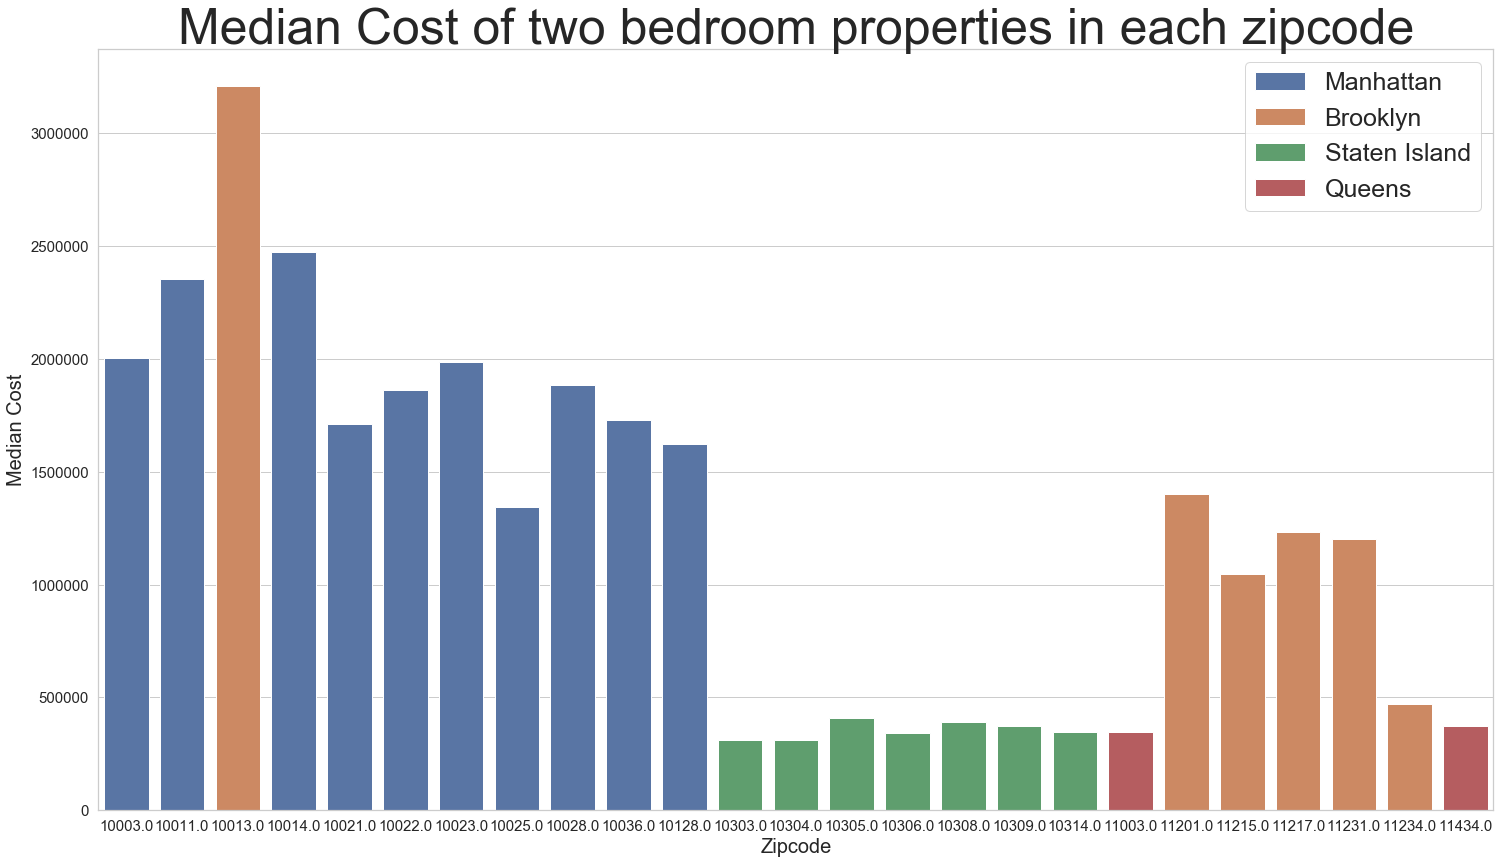

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 14]

sns.set(style="whitegrid")
df=airbnb_unique_df.groupby(['zipcode','neighbourhood_group_cleansed'])['median_cost'].median().to_frame().reset_index()

ax = sns.barplot(x="zipcode", y="median_cost", data=df,hue='neighbourhood_group_cleansed',dodge=False)
ax.set(xlabel='Avg Cost', ylabel='neighbourhood_group_cleansed')
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Median Cost', fontsize=20)

ax.axes.set_title("Median Cost of two bedroom properties in each zipcode",fontsize=50)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    

### Calculate price assuming 75% occupancy

In [29]:
airbnb_breakeven_df=airbnb_unique_df[['zipcode','neighbourhood_group_cleansed','price','median_cost']]
airbnb_75_occ_df=airbnb_breakeven_df.groupby(['zipcode','neighbourhood_group_cleansed'])['price'].median()
airbnb_75_occ_df=(airbnb_75_occ_df*.75).reset_index()
airbnb_zipcode_neighbourhood_df=airbnb_75_occ_df[['zipcode','neighbourhood_group_cleansed']]
airbnb_zipcode_neighbourhood_df.to_csv('airbnb_zipcode_neighbourhood_df.csv')

In [30]:
def get_price_75(each_zipcode):
    zipcode=int(each_zipcode)
    return(airbnb_75_occ_df[airbnb_75_occ_df.zipcode==(zipcode)]['price'].median())

#Dataframe with zipcode,neighbourhood,median_price,median_price_75,median_cost
airbnb_breakeven_df['price_75']=airbnb_breakeven_df.zipcode.apply(get_price_75)

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Calculate breakeven in number of years

In [31]:
def find_breakeven_years(each_row):
    years=each_row.median_cost/each_row.price_75
    years=years/365
    return years

airbnb_breakeven_df['years']=airbnb_breakeven_df.apply(find_breakeven_years,axis=1)

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Time taken to pay back cost in years

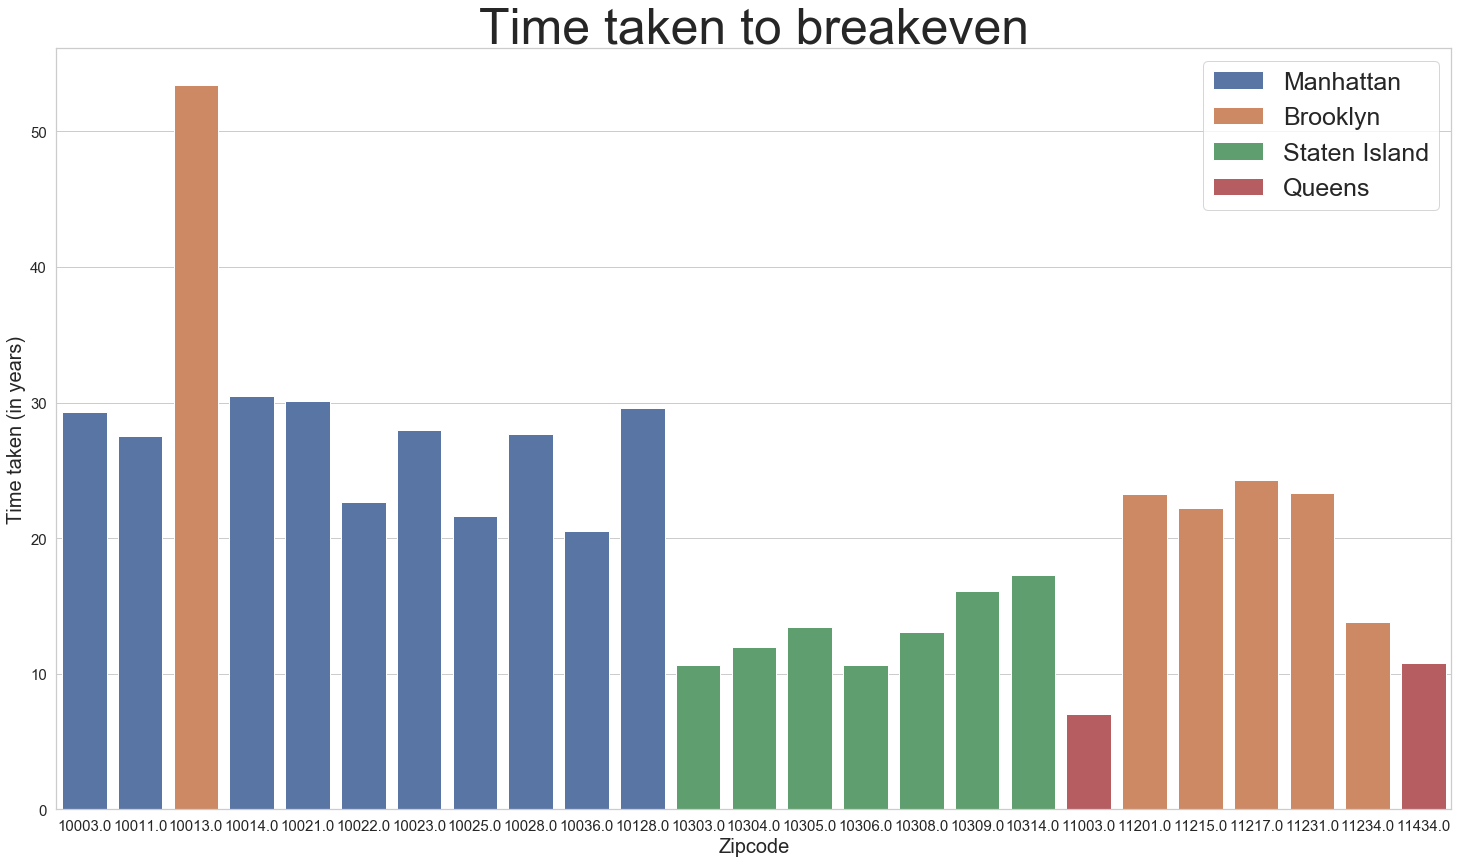

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 14]


sns.set(style="whitegrid")
df=airbnb_breakeven_df.groupby(['zipcode','neighbourhood_group_cleansed'])['years'].median().to_frame().reset_index()

ax = sns.barplot(x="zipcode", y="years", data=df,hue='neighbourhood_group_cleansed',dodge=False)
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Time taken (in years)', fontsize=20)

ax.axes.set_title("Time taken to breakeven",fontsize=50)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### Scatterplot of time taken to repay vs Median price 

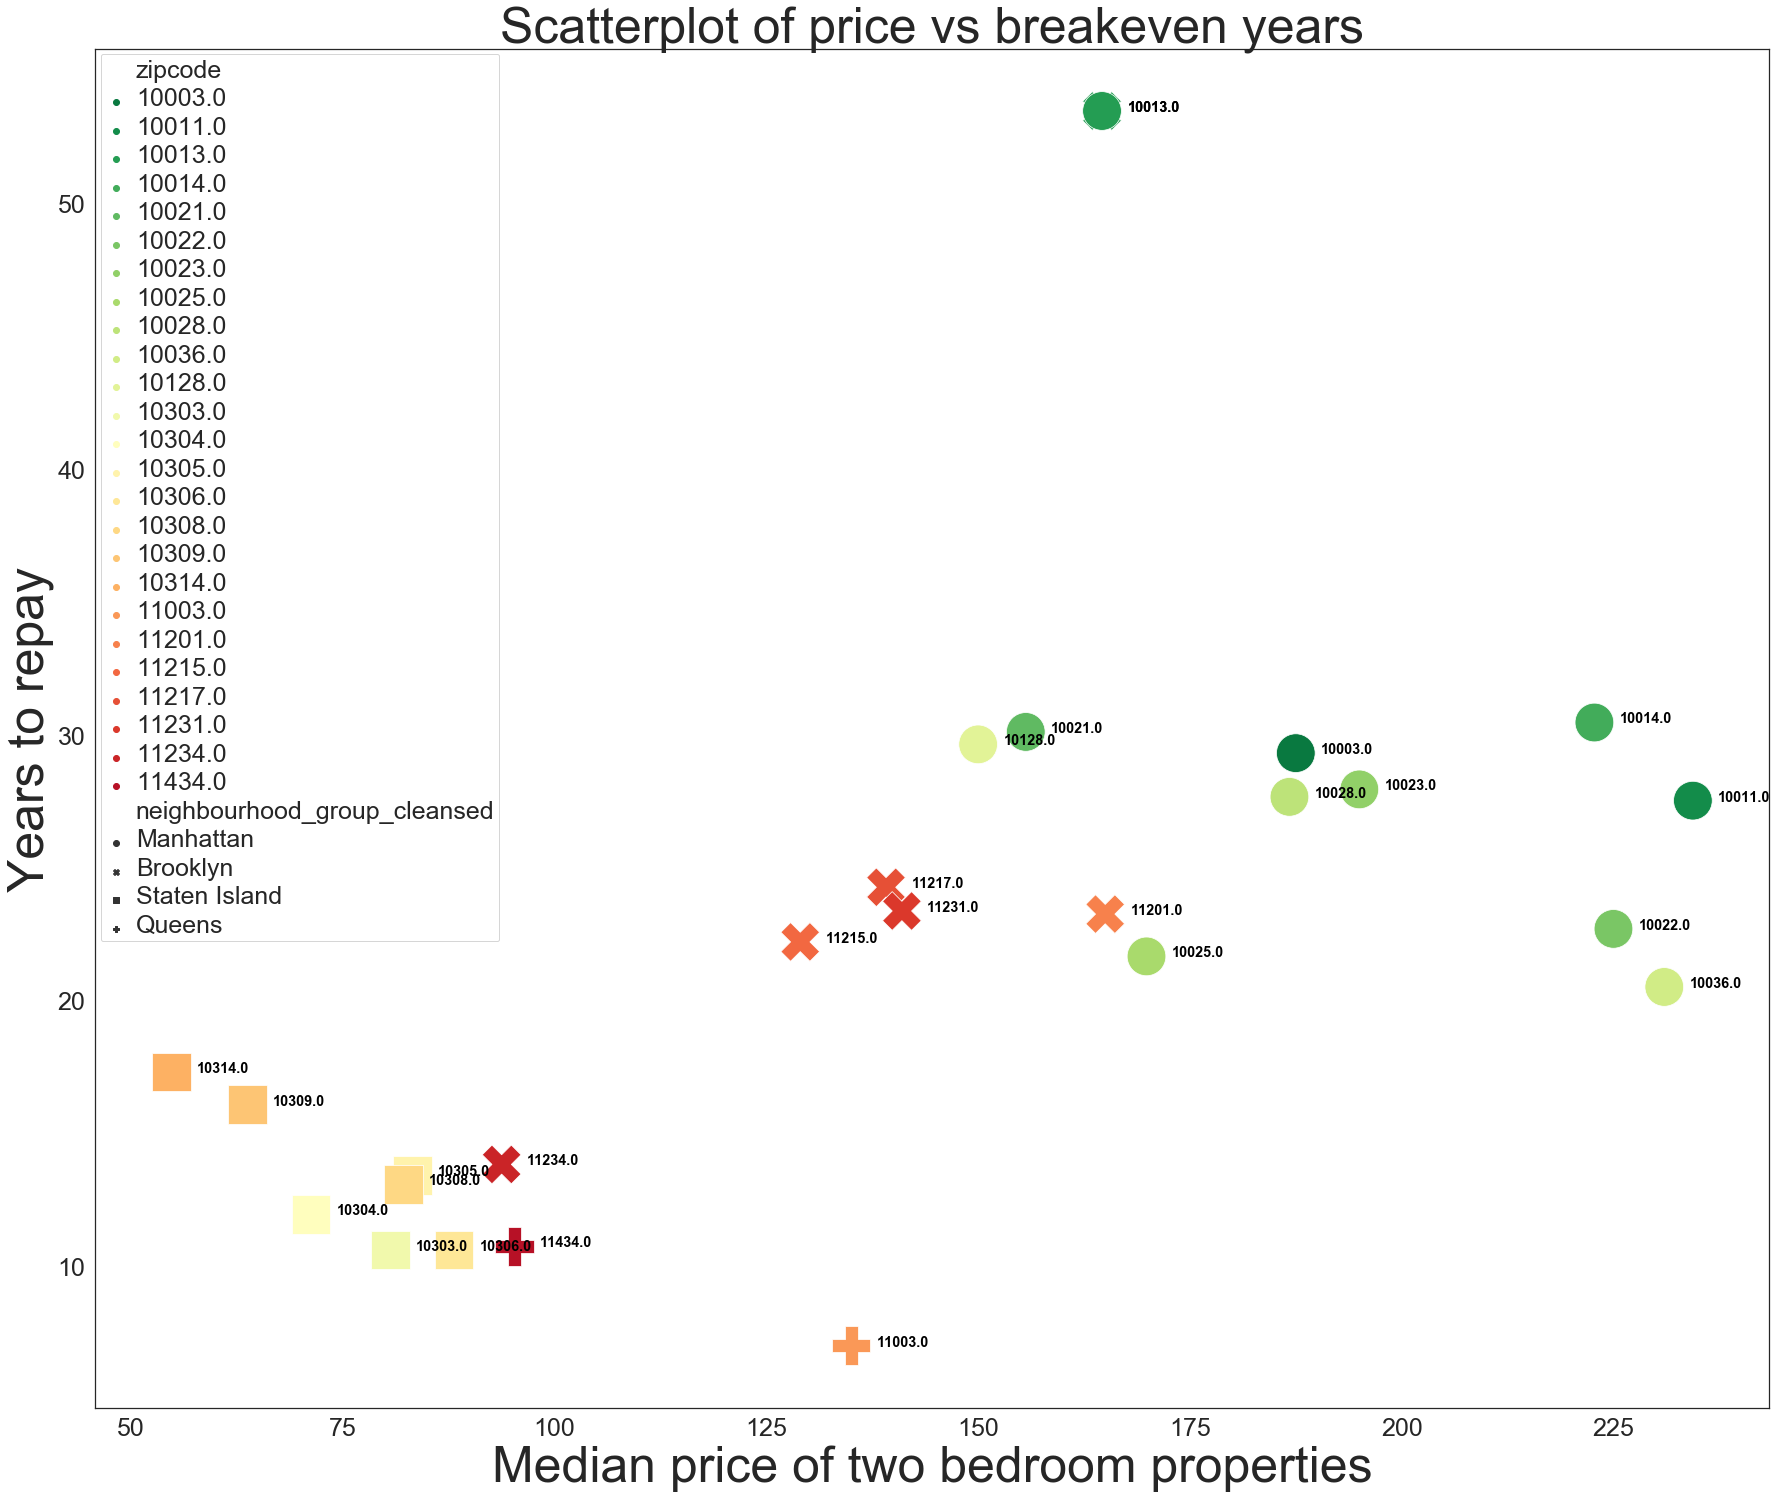

In [33]:
airbnb_breakeven_df=airbnb_breakeven_df.groupby(['zipcode','neighbourhood_group_cleansed','price_75'])['years'].median().to_frame().reset_index()

plt.rcParams['figure.figsize'] = [30, 25]
sns.set(style="white")
ax = sns.scatterplot(x="price_75", y="years", hue="zipcode", style='neighbourhood_group_cleansed', palette=sns.color_palette("RdYlGn_r", 25),s=1500,data=airbnb_breakeven_df)


plt.setp(ax.get_legend().get_texts(), fontsize='25') 
plt.setp(ax.get_legend().get_title(), fontsize='25')
for line in range(0,int(airbnb_breakeven_df.shape[0])):
     ax.text(airbnb_breakeven_df.price_75[line]+3, airbnb_breakeven_df.years[line], 
     airbnb_breakeven_df.zipcode[line], horizontalalignment='left', 
     size='large', color='black', weight='semibold')
plt.title('Scatterplot of price vs breakeven years',fontsize='50')
# Set x-axis label
plt.xlabel('Median price of two bedroom properties',fontsize='50')
# Set y-axis label
plt.ylabel('Years to repay',fontsize='50')
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)       